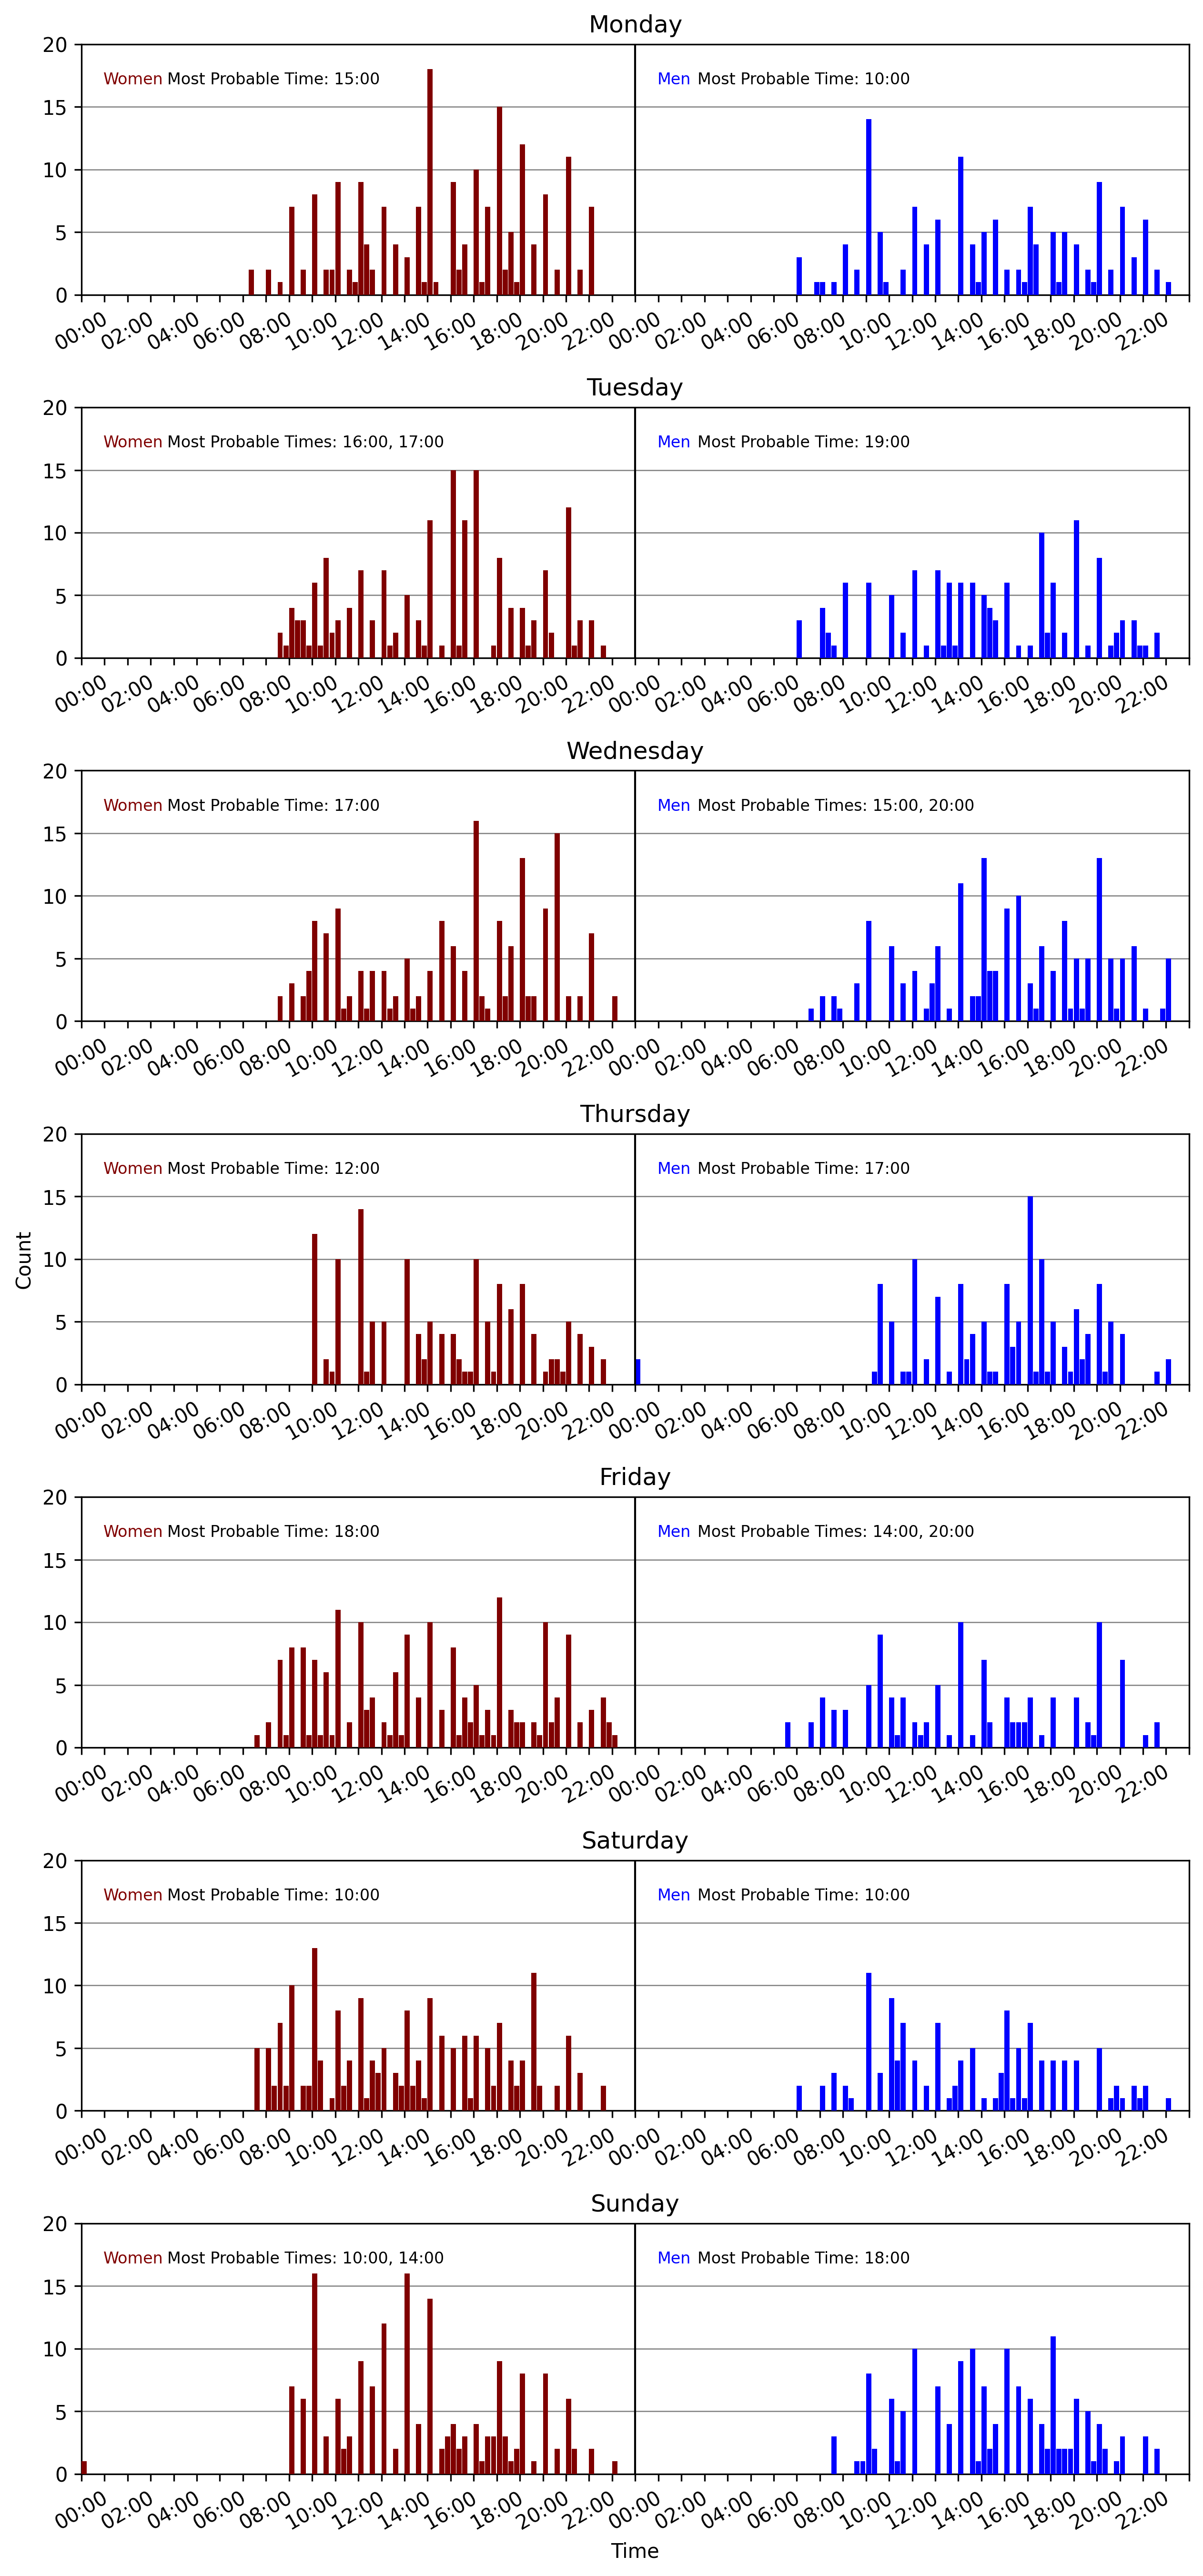

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import datetime

data = pd.read_csv('anonymized.csv')
# date_format = "%a,%d,%b,%Y,%H:%M"
df = data
df.insert(2, 'date', '')
df['date'] = pd.to_datetime(df['day'].astype(str) + ' ' + df['month'] + ' ' + df['year'].astype(str), format='%d %B %Y')

# Drop the original 'day', 'month', and 'year' columns if needed
df = df.drop(columns=['day', 'month', 'year'])

weekdays = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']
weekdays_dict = {
    'Mo': "Monday",
    'Di': "Tuesday",
    'Mi': "Wednesday",
    'Do': "Thursday",
    'Fr': "Friday",
    'Sa': "Saturday",
    'So': "Sunday"
}

weekdays_data_dict_female = {
    'Mo': "time_sum_monday_w",
    'Di': "time_sum_tuesday_w",
    'Mi': "time_sum_wednesday_w",
    'Do': "time_sum_thursday_w",
    'Fr': "time_sum_friday_w",
    'Sa': "time_sum_saturday_w",
    'So': "time_sum_sunday_w"
}

weekdays_data_dict_male = {
    'Mo': "time_sum_monday_m",
    'Di': "time_sum_tuesday_m",
    'Mi': "time_sum_wednesday_m",
    'Do': "time_sum_thursday_m",
    'Fr': "time_sum_friday_m",
    'Sa': "time_sum_saturday_m",
    'So': "time_sum_sunday_m"
}

men_data = df.loc[df['sex'] == 'm']
women_data_with_putzfrau = df.loc[df['sex'] == 'f']
women_data = women_data_with_putzfrau.loc[women_data_with_putzfrau['pseudonym'] != 'Putzfrau']

# male_data_sum = np.zeros(96, dtype=int)
# female_data_sum = np.zeros(96, dtype=int)

for index_day, day in enumerate(weekdays):
    woman_data_weekday = women_data.loc[women_data['weekday'] == day]
    male_data_weekday = men_data.loc[men_data['weekday'] == day]

    weekdays_data_dict_female[day] = np.zeros(96, dtype=int)
    weekdays_data_dict_male[day] = np.zeros(96, dtype=int)
    
    for time_i in woman_data_weekday['start_time']:
        ind = int(int(time_i.split(':')[0]) * 4 + (int(time_i.split(':')[1]) / 15))
        weekdays_data_dict_female[day][ind] += 1
        
    # male_data_sum += weekdays_data_dict_male
        
    for time_i in male_data_weekday['start_time']:
        ind = int(int(time_i.split(':')[0]) * 4 + (int(time_i.split(':')[1]) / 15))
        weekdays_data_dict_male[day][ind] += 1
        
    # male_data_sum += weekdays_data_dict_male
        
        
intervals = list(range(192))
fig, ax = plt.subplots(nrows=7, figsize=(10, 25), sharex=False, dpi=300, zorder=4)
zeroes_array = np.zeros(96, dtype=int)


time_stamps = np.linspace(0, 192, 49)
time_labels = ["00:00", "", "02:00", "", "04:00", "", "06:00", "", "08:00", "", "10:00", "", "12:00", "", "14:00", "", "16:00", "", "18:00", "", "20:00", "", "22:00", "", "00:00", "", "02:00", "", "04:00", "", "06:00", "", "08:00", "", "10:00", "", "12:00", "", "14:00", "", "16:00", "", "18:00", "", "20:00", "", "22:00", "", ""]

ax[6].set_xlabel("Time") 
ax[3].set_ylabel("Count")
plt.subplots_adjust(hspace=0.45, bottom=0.2)

y_pos = [5, 10, 15, 20]

for subplot in ax:
    subplot.set_xlim(0, 192)
    subplot.set_ylim(0, 20)
    subplot.set_xticks(time_stamps)
    subplot.set_xticklabels(labels=time_labels, rotation=30)
    for yc in y_pos:
        subplot.axhline(y=yc, color='grey', linewidth=0.6, zorder=2)
    subplot.axvline(x=96, color='black', linewidth=1, zorder=4)

for index, day in enumerate(weekdays_data_dict_female):
    
    ax[index].bar(intervals, np.concatenate((zeroes_array, weekdays_data_dict_male[day]), axis=0), label='Set1', width=0.9, color='blue', align='edge', zorder=3)
    ax[index].bar(intervals, np.concatenate((weekdays_data_dict_female[day], zeroes_array), axis=0), label='Set1', width=0.9, color='maroon', align='edge', zorder=3)
    
    max_times_woman = np.flatnonzero(weekdays_data_dict_female[day] == np.max(weekdays_data_dict_female[day])).tolist()
    for index_times, times in enumerate(max_times_woman):
        max_times_woman[index_times] = f"{3*times // 12:02d}:{(3*times % 12) * 5:02d}"
        
    if len(max_times_woman) == 1:
        plural_w = "Time"
    else:
        plural_w = "Times"
        
    max_times_man = np.flatnonzero(weekdays_data_dict_male[day] == np.max(weekdays_data_dict_male[day])).tolist()
    for index_times, times in enumerate(max_times_man):
        max_times_man[index_times] = f"{3*times // 12:02d}:{(3*times % 12) * 5:02d}"
        
    if len(max_times_man) == 1:
        plural_m = "Time"
    else:
        plural_m = "Times"
        
    ax[index].text(0.02, 0.89, f"Women", transform=ax[index].transAxes, ha='left', va='top', rotation=0, color='maroon', fontsize=8) 
    ax[index].text(0.0775, 0.89, f"Most Probable {plural_w}: {', '.join([str(x) for x in [*max_times_woman]])}", transform=ax[index].transAxes, ha='left', va='top', rotation=0, color='black', fontsize=8) 

    ax[index].text(0.52, 0.89, f"Men", transform=ax[index].transAxes, ha='left', va='top', rotation=0, color='blue', fontsize=8) 
    ax[index].text(0.556, 0.89, f"Most Probable {plural_m}: {', '.join([str(x) for x in [*max_times_man]])}", transform=ax[index].transAxes, ha='left', va='top', rotation=0, color='black', fontsize=8) 
    
    ax[index].set_title(f"{weekdays_dict[day]}")
    
plt.show()